In [48]:
# Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Импортируем необходимые библиотеки и присваиваем им сокращенные названия. 

In [49]:
# Importing the dataset
df = pd.read_csv('kr1_var2.csv', sep=',')

Импортируем файл с данными используя библиотеку пандас.

In [50]:
df

,Wind_direction,Humidity,Pressure,Temperature
0,97.2,90.4,881.6,-4.9
1,98.3,90.6,882.1,-4.9
2,93.9,89.8,882.8,-4.8
3,95.7,88.8,882.9,-4.6
4,101.8,86.0,882.9,-4.8
...,...,...,...,...
2726,311.4,16.1,890.3,11.0
2727,308.5,17.0,890.1,11.0
2728,314.1,18.1,889.9,10.6
2729,320.2,18.3,889.8,10.6


Вывод: для построения модели прогнозирования температуры были использованы такие факторы как уровень влажности, давления и направление ветра. Количество наблюдений 2731, количество факторов 4 и все количественные.

In [51]:
df.dtypes

Wind_direction    float64
Humidity          float64
Pressure          float64
Temperature       float64
dtype: object

In [52]:
df.describe()

,Wind_direction,Humidity,Pressure,Temperature
count,2731.000000,2731.000000,2731.000000,2731.000000
mean,240.358220,47.201867,892.789198,-3.104540
std,90.725416,22.757152,17.907389,4.613113
min,2.500000,15.000000,870.900000,-16.000000
25%,119.900000,31.300000,881.800000,-5.900000
50%,292.800000,39.800000,885.700000,-3.300000
75%,299.300000,55.250000,896.600000,-0.300000
max,359.900000,99.400000,945.500000,14.000000


Описываем основные статистики наших данных. Можем видеть среднее значение по каждой переменной, 
стандартное отклонение, минимум, максимум и сколько попадает в 25%, 50% и 75%.

D:\progs\Anaconda\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


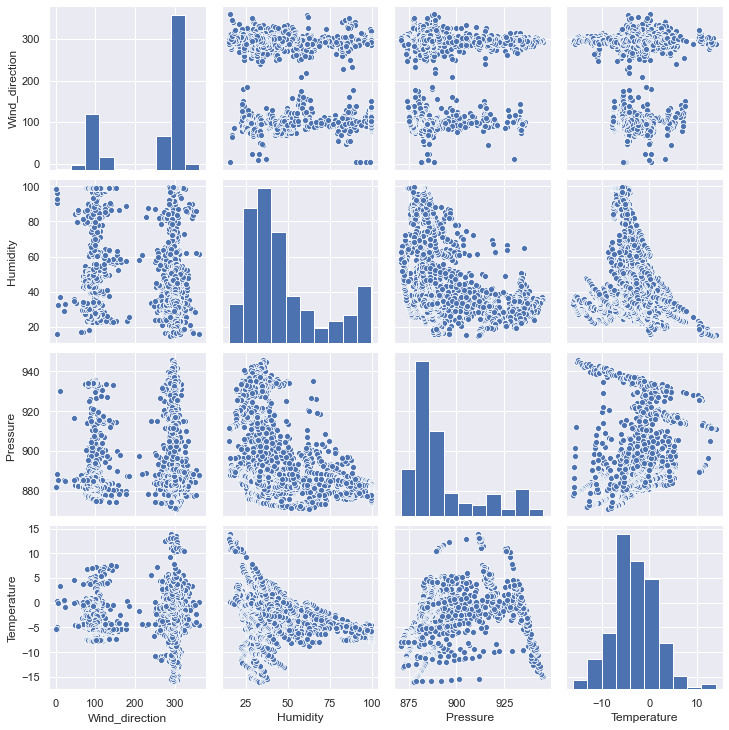

In [53]:
# Features distribution
import seaborn as sns
sns.set()
sns.pairplot(df, size = 2.5)
plt.show();

Демонтрация распределений.

In [54]:
# Function Outliers
def outliers(df):
    num_var = list(df._get_numeric_data().columns)
    for col_names in num_var:
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()-3*df[col_names].std() 
                            if y < df[col_names].mean()-3*df[col_names].std() else y)
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()+3*df[col_names].std() 
                            if y > df[col_names].mean()+3*df[col_names].std() else y)
    return(df)

Обрабатываем выбросы с помощью цикла for и условного ветвления if.

In [55]:
# Outliers
df = outliers(df)
df.describe()

,Wind_direction,Humidity,Pressure,Temperature
count,2731.000000,2731.000000,2731.000000,2731.000000
mean,240.358220,47.201867,892.789198,-3.119733
std,90.725416,22.757152,17.907389,4.563757
min,2.500000,15.000000,870.900000,-16.000000
25%,119.900000,31.300000,881.800000,-5.900000
50%,292.800000,39.800000,885.700000,-3.300000
75%,299.300000,55.250000,896.600000,-0.300000
max,359.900000,99.400000,945.500000,10.734800


Так как статистика не поменялась, можно сделать вывод, что выбросов не было.

In [56]:
# Cheking Missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Temperature,0,0.0
Pressure,0,0.0
Humidity,0,0.0
Wind_direction,0,0.0


Проверяем наличие пропусков, их нет, движемся дальше.

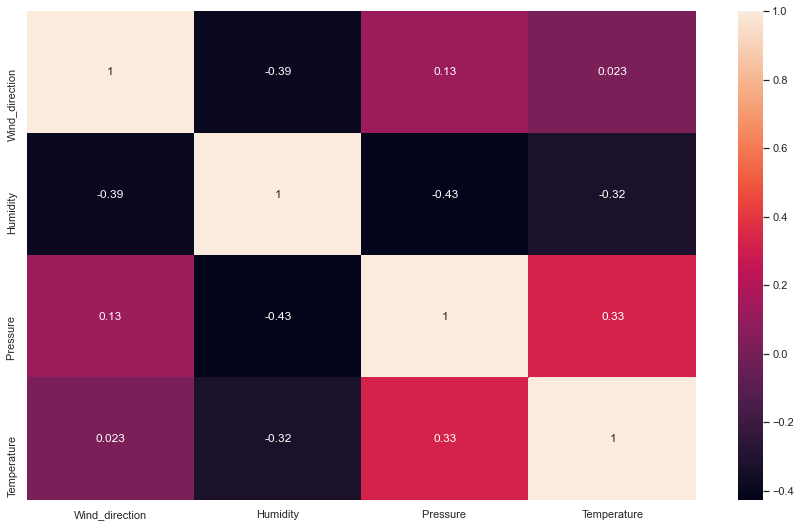

In [57]:
# Cheking correlations
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(15, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

Для того, чтобы выяснить какие переменные у нас самые значимые, мы построим их корреляционную матрицу и видим, 
что влажность и давление имеют относительно всокие корреляции.

In [58]:
# Splitting the dataset into the Training set and Test set
X = df.iloc[:, :-1].values
y = df.iloc[:, 3].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

Выделил нужные Х и У, а затем разделил датасет на тестовый (20%) и обучающий (80%).

In [59]:
# Multiple Linear Regression, checking p-values
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
X = sm.add_constant(X_train)
mr1 = sm.OLS(y_train, X).fit()
#mr1.pvalues
mr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     141.8
Date:                Tue, 29 Dec 2020   Prob (F-statistic):           5.86e-84
Time:                        10:16:10   Log-Likelihood:                -6236.3
No. Observations:                2184   AIC:                         1.248e+04
Df Residuals:                    2180   BIC:                         1.250e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -54.8012      5.160    -10.619      0.000     -64.921     -44.681
x1            -0.0051      0.001     -4.744      0.000      -0.007      -0.003
x2            -0.0533      0.005    -11.308      0.000      -0.063      -0.044
x3             0.0622      0.006     11.008      0.000       0.051       0.073
==============================================================================
Omnibus:                       96.195   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.707
Skew:                          -0.363   Prob(JB):                     1.27e-35
Kurtosis:                       4.113   Cond. No.                     5.31e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

С помощью библиотеки statsmodels строим множественную регрессию, при этом добавляем константу.
Затем узнаем p-values у всех переменных, R-sq и можем решить, что будем включать все переменные, так как их порог p-value < 1%.

In [60]:
X_train = X_train[:, [0, 1, 2]]
X_test = X_test[:, [0, 1, 2]]

In [61]:
# Fitting Optimized Multiple Regression to the Training set
mr = LinearRegression().fit(X_train, y_train)

Строим модель для train-множества.

In [62]:
# Getting parameters
mr.coef_, mr.intercept_

(array([-0.00512439, -0.05332667,  0.06217145]), -54.801198003927325)

Оцениваем коэффициенты регрессии.

In [63]:
# Predicting the Test set results
y_pred = mr.predict(X_test)

Строим прогноз по этой модели.

In [64]:
# Coefficient of determination R^2
mr.score(X_train, y_train), mr.score(X_test, y_test)

(0.16332152012468915, 0.13234229814889376)

Оцениваем коэффициент детерминации, видим, что на обучающей выборке 0,163, а вот на 
тестовой выборке он упал, что говорит о том, что модель ухудшилась и множественная регрессия не подходит.

In [65]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, mr.predict(X_train)), mean_squared_error(y_test, y_pred)

(17.690683778482523, 16.857911187159996)

Оцениваем среднюю квадратическую ошибку, видим что на тестовой выборке она меньше.

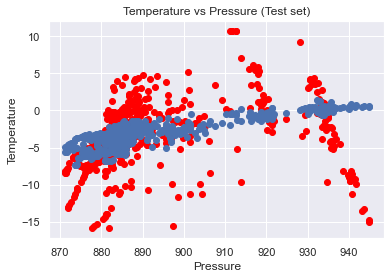

In [66]:
# Visualising the Test set results
plt.scatter(X_test[:,2], y_test, color = 'red')
plt.plot(X_test[:,2], mr.predict(X_test), 'bo')
plt.title('Temperature vs Pressure (Test set)')
plt.xlabel('Pressure')
plt.ylabel('Temperature')
plt.show()

Визуализируем результаты, видим линейность.

In [67]:
import pickle
obj = {'X_train': X_train, 'X_test': X_test,'y_train': y_train,'y_test': y_test}
output = open('data_reg.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()

Законсервировали тот результат, с которым дальше будем работать.

In [68]:
# Importing prepared dataset
import pickle
input = open('data_reg.pkl', 'rb')
obj = pickle.load(input)
input.close()
X_train = obj["X_train"]
X_test = obj["X_test"]
y_train = obj["y_train"]
y_test = obj["y_test"]

Импортируем подготовленные данные.

In [69]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler().fit(np.array([[i] for i in y_train]))
y_train = sc_y.transform(np.array([[i] for i in y_train]))
y_test = sc_y.transform(np.array([[i] for i in y_test]))

Проводим шкалирование данных.

In [70]:
# Install Tensorflow
# Install Keras
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [71]:
# Initialising the ANN
rnn = Sequential()

# Adding the input layer and the first hidden layer
rnn.add(Dense(units = 6, activation = 'tanh', input_dim = 3))

# Adding the second hidden layer
rnn.add(Dense(units = 4, activation = 'tanh'))

# Adding the output layer
rnn.add(Dense(units = 1, activation = 'linear'))

# Compiling the ANN
rnn.compile(optimizer='adam', loss='mean_squared_error', metrics = ['accuracy'])

Создаем нейронную сеть rnn, так как у нас 3 переменных значимы, то размерность входного слоя = 3. Так как модель используется для прогнозирования, следовательно архитектура должна быть расширяющей, на первом слое возьмем больше нейронов - 6.

In [72]:
# Fitting the ANN to the Training set
rnn.fit(X_train, y_train, batch_size = 8, epochs = 100)

Epoch 1/100
273/273 [==============================] - 0s 449us/step - loss: 0.9546 - accuracy: 0.0000e+00
Epoch 2/100
273/273 [==============================] - 0s 449us/step - loss: 0.7688 - accuracy: 0.0000e+00
Epoch 3/100
273/273 [==============================] - 0s 435us/step - loss: 0.7336 - accuracy: 0.0000e+00
Epoch 4/100
273/273 [==============================] - 0s 449us/step - loss: 0.7080 - accuracy: 0.0000e+00
Epoch 5/100
273/273 [==============================] - 0s 439us/step - loss: 0.6857 - accuracy: 0.0000e+00
Epoch 6/100
273/273 [==============================] - 0s 460us/step - loss: 0.6713 - accuracy: 0.0000e+00
Epoch 7/100
273/273 [==============================] - 0s 460us/step - loss: 0.6594 - accuracy: 0.0000e+00
Epoch 8/100
273/273 [==============================] - 0s 454us/step - loss: 0.6507 - accuracy: 0.0000e+00
Epoch 9/100
273/273 [==============================] - 0s 442us/step - loss: 0.6416 - accuracy: 0.0000e+00
Epoch 10/100
273/273 [===============

Epoch 77/100
273/273 [==============================] - 0s 442us/step - loss: 0.5031 - accuracy: 0.0000e+00
Epoch 78/100
273/273 [==============================] - 0s 435us/step - loss: 0.5020 - accuracy: 0.0000e+00
Epoch 79/100
273/273 [==============================] - 0s 424us/step - loss: 0.5044 - accuracy: 0.0000e+00
Epoch 80/100
273/273 [==============================] - 0s 424us/step - loss: 0.5034 - accuracy: 0.0000e+00
Epoch 81/100
273/273 [==============================] - 0s 427us/step - loss: 0.5027 - accuracy: 0.0000e+00
Epoch 82/100
273/273 [==============================] - 0s 427us/step - loss: 0.5028 - accuracy: 0.0000e+00
Epoch 83/100
273/273 [==============================] - 0s 427us/step - loss: 0.5003 - accuracy: 0.0000e+00
Epoch 84/100
273/273 [==============================] - 0s 435us/step - loss: 0.4991 - accuracy: 0.0000e+00
Epoch 85/100
273/273 [==============================] - 0s 435us/step - loss: 0.4993 - accuracy: 0.0000e+00
Epoch 86/100
273/273 [======

Обучаем нашу сеть на обучающей выборке, по 8 объектов, в течение 100 эпох.

In [73]:
# Predicting the Test set results
y_pred = rnn.predict(X_test)

In [74]:
# Inversing scaling
#yhat = pd.DataFrame(yhat, columns=['yhat']) 
from sklearn.preprocessing import StandardScaler
y_hat = sc_y.inverse_transform(y_pred)
y_test = sc_y.inverse_transform(y_test)
X_test = sc_X.inverse_transform(X_test)

In [75]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_hat)

9.254157234130998

Вычислим сумму квадратов ошибок, у линейной модели было 17, качество заметно улучшилось.

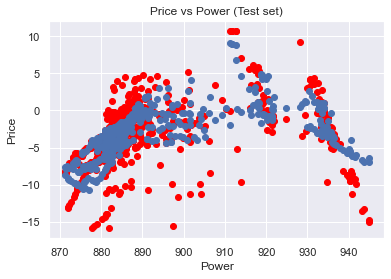

In [76]:
# Visualising the Test set results
plt.scatter(X_test[:,2], y_test, color = 'red')
plt.plot(X_test[:,2], y_hat, 'bo')
plt.title('Price vs Power (Test set)')
plt.xlabel('Power')
plt.ylabel('Price')
plt.show()

Визуализация результатов: красным отмечены - фактические значения, а синими - наши расчетные значения, видим что наша модель в целом достаточно хорошо прогнозирует, если сравнить с графиком множественной регрессии, то разница очень заметна. Вывод: были проведены эксперименты, в итоге данная архитектура лучше всего пригодна для построение нейронной сети.